# Import Packages

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings # to ignore warnings
warnings.filterwarnings("ignore") # no warnings will be printed from now on

# Importing Data

In [113]:
#Import CSV file and print top 5 rows
Fifa23 = pd.read_csv('/Users/giancarloantonioluongo/Downloads/archive/players_fifa23.csv')
Fifa23.head()

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,35,169,67,https://cdn.sofifa.net/players/158/023/23_60.png,Argentina,91,91,...,91,88,91,67,66,67,62,53,62,22
1,165153,K. Benzema,Karim Benzema,34,185,81,https://cdn.sofifa.net/players/165/153/23_60.png,France,91,91,...,89,84,89,67,67,67,63,58,63,21
2,188545,R. Lewandowski,Robert Lewandowski,33,185,81,https://cdn.sofifa.net/players/188/545/23_60.png,Poland,91,91,...,86,83,86,67,69,67,64,63,64,22
3,192985,K. De Bruyne,Kevin De Bruyne,31,181,70,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,91,91,...,91,91,91,82,82,82,78,72,78,24
4,231747,K. Mbappé,Kylian Mbappé,23,182,73,https://cdn.sofifa.net/players/231/747/23_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21


In [114]:
#View how many rows and columns
Fifa23.shape

(18539, 90)

# Preparation - Part 1

In [115]:
#Check for null values
missing_values_count = Fifa23.isnull().sum() 
print(missing_values_count)

ID           0
Name         0
FullName     0
Age          0
Height       0
            ..
RWBRating    0
LBRating     0
CBRating     0
RBRating     0
GKRating     0
Length: 90, dtype: int64


In [116]:
#check for duplicate players
Fifa23.duplicated(subset='Name')

0        False
1        False
2        False
3        False
4        False
         ...  
18534    False
18535    False
18536    False
18537    False
18538    False
Length: 18539, dtype: bool

In [117]:
#No duplicates but want to create a more concise version of the table that has fewer columns.
Fifa23_Concise = Fifa23[['FullName', 'Age', 'Nationality', 'ValueEUR', 'WageEUR', 'NationalTeam','PreferredFoot','Club', 'Potential']]

In [118]:
#Check the shape to confirm fewer columns
Fifa23_Concise.shape

(18539, 9)

In [119]:
#Sort by highest valued players and see the top 10 
Fifa23_Concise_Sorted = Fifa23_Concise.sort_values('ValueEUR', ascending=False)
print(Fifa23_Concise_Sorted.head(n=10))

                            FullName  Age  Nationality   ValueEUR  WageEUR  \
4                      Kylian Mbappé   23       France  190500000   230000   
21                    Erling Haaland   21       Norway  148000000   220000   
42                   Frenkie de Jong   25  Netherlands  116500000   230000   
82              Pedro González López   19        Spain  116000000   115000   
5                      Mohamed Salah   30        Egypt  115500000   270000   
83                        Phil Foden   22      England  109500000   180000   
63  Vinícius José de Oliveira Júnior   21       Brazil  109000000   200000   
20      Rúben Santos Gato Alves Dias   25     Portugal  107500000   230000   
3                    Kevin De Bruyne   31      Belgium  107500000   350000   
17                    Joshua Kimmich   27      Germany  105500000   130000   

   NationalTeam PreferredFoot                 Club  Potential  
4        France         Right  Paris Saint-Germain         95  
21       Norw

In [120]:
#Clean up table by removing those with no wages
Fifa23_Wages = Fifa23_Concise[Fifa23_Concise['WageEUR'] != 0]

# Preparation - Part 2 (Joining Data)

In [121]:
#The league information is missing from this dataset, I need to join data from a seperate dataset
#Import second csv file
#Look at the top 5 rows
Leagues = pd.read_csv('/Users/giancarloantonioluongo/Downloads/archive/teams_fifa23.csv')
Leagues.head()

,ID,Name,League,LeagueId,Overall,Attack,Midfield,Defence,TransferBudget,DomesticPrestige,IntPrestige,Players,StartingAverageAge,AllTeamAverageAge
0,1943,AFC Bournemouth,English Premier League (1),13,74,75,73,73,0,2,1,28,25.8,25.5
1,116418,AFC Richmond,English Premier League (1),13,78,81,79,77,0,5,3,19,27.3,27.3
2,1,Arsenal,English Premier League (1),13,80,83,81,79,0,7,7,29,24.1,23.0
3,2,Aston Villa,English Premier League (1),13,79,79,78,80,0,5,3,32,25.8,25.2
4,1925,Brentford,English Premier League (1),13,75,75,74,75,0,1,1,30,25.4,24.2


In [122]:
#I notice the keys have different column heading names between the two tables. Instead of specifying the key, I chose to rename a column.
LeaguesRename = Leagues.rename(columns={'Name': 'Club'})
#I also want to reduce the size of the table, so that when I merge it will just bring in the desired information as opposed to the whole table
Leagues2 = LeaguesRename[['Club', 'League']]


In [123]:
#Create a new table for merged data
Fifa_Consolidated = Fifa23_Wages.merge(Leagues2, how='left')
#Show top 5 rows to confirm dataframe is set up as expected
Fifa_Consolidated.head()

,FullName,Age,Nationality,ValueEUR,WageEUR,NationalTeam,PreferredFoot,Club,Potential,League
0,Lionel Messi,35,Argentina,54000000,195000,Argentina,Left,Paris Saint-Germain,91,French Ligue 1 (1)
1,Karim Benzema,34,France,64000000,450000,France,Right,Real Madrid CF,91,Spain Primera Division (1)
2,Robert Lewandowski,33,Poland,84000000,420000,Poland,Right,FC Barcelona,91,Spain Primera Division (1)
3,Kevin De Bruyne,31,Belgium,107500000,350000,Belgium,Right,Manchester City,91,English Premier League (1)
4,Kylian Mbappé,23,France,190500000,230000,France,Right,Paris Saint-Germain,95,French Ligue 1 (1)


In [124]:
#Check for any null values in the League column
Fifa_Consolidated[Fifa_Consolidated['League'].isnull()]

,FullName,Age,Nationality,ValueEUR,WageEUR,NationalTeam,PreferredFoot,Club,Potential,League
2407,Hernani Azevedo Júnior,28,Brazil,3000000,5000,Not in team,Right,Urbs Reggina 1914,73,NaN
3329,Lorenzo Crisetig,29,Italy,2000000,3000,Not in team,Left,Urbs Reggina 1914,72,NaN
3570,Federico Ricci,28,Italy,2400000,3000,Not in team,Left,Urbs Reggina 1914,72,NaN
5086,Michele Camporese,30,Italy,1300000,2000,Not in team,Right,Urbs Reggina 1914,70,NaN
5089,Thiago Rangel Cionek,36,Poland,275000,1000,Not in team,Right,Urbs Reggina 1914,70,NaN
5267,Joel Obi,31,Nigeria,1100000,2000,Not in team,Left,Urbs Reggina 1914,69,NaN
5328,Gianluca Di Chiara,28,Italy,1300000,2000,Not in team,Left,Urbs Reggina 1914,69,NaN
5591,Riccardo Gagliolo,32,Sweden,900000,2000,Not in team,Left,Urbs Reggina 1914,69,NaN
5750,Jérémy Ménez,35,France,575000,1000,Not in team,Right,Urbs Reggina 1914,69,NaN
6486,Daniele Liotti,28,Italy,1100000,1000,Not in team,Left,Urbs Reggina 1914,68,NaN


In [125]:
#Drop null values in the League column
Fifa_Consolidated.dropna(subset = ['League'], inplace=True)

# Preliminary Analysis To See Quick Stats

In [126]:
#See some quick stats following prepartion of the table
Fifa_Consolidated[['Age', 'WageEUR', 'Potential']].describe()

,Age,WageEUR,Potential
count,18419.000000,18419.000000,18419.000000
mean,25.226722,8878.595472,71.016668
std,4.717616,19511.852440,6.200858
min,16.000000,500.000000,48.000000
25%,21.000000,1000.000000,67.000000
50%,25.000000,3000.000000,71.000000
75%,29.000000,8000.000000,75.000000
max,44.000000,450000.000000,95.000000


In [127]:
#Further analysis - Print the League for highest and lowest players 

print("The League with the highest paid player is the "+ Fifa_Consolidated.loc[Fifa_Consolidated['WageEUR'].idxmax(),'League']+ " at €" + str(int(Fifa_Consolidated['WageEUR'].max()))+'\n')
print("The League with the lowest paid player is the "+ Fifa_Consolidated.loc[Fifa_Consolidated['WageEUR'].idxmin(),'League']+ " at €" + str(int(Fifa_Consolidated['WageEUR'].min()))+'\n')

The League with the highest paid player is the Spain Primera Division (1) at €450000

The League with the lowest paid player is the Ukrainian Premier League (1) at €500



<AxesSubplot:xlabel='Nationality'>

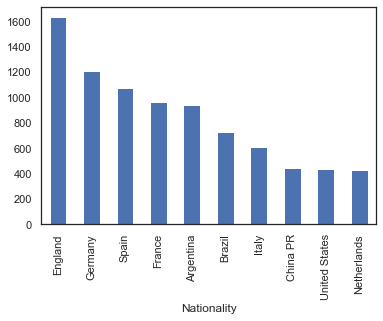

In [128]:
#Visualisation - What are the top 10 nationalities that feature most in the dataframe
Fifa_Consolidated.value_counts('Nationality').head(10).plot.bar()

# Addition of a new column based on conditions

In [129]:
# Create re-usable code for a list of conditions to categorise those whos wage is above or below average
conditions = [
    (Fifa_Consolidated['WageEUR'] < Fifa_Consolidated['WageEUR'].mean()),
    (Fifa_Consolidated['WageEUR'] >= Fifa_Consolidated['WageEUR'].mean())
    ]

# create a list of the values to assign for each condition
values = ['Below Average', 'Above Average']

# create a new column and use np.select to assign values to it using the list as arguments
Fifa_Consolidated['WageStatus'] = np.select(conditions, values)

# display top rows of the updated dataframe
Fifa_Consolidated.head()


,FullName,Age,Nationality,ValueEUR,WageEUR,NationalTeam,PreferredFoot,Club,Potential,League,WageStatus
0,Lionel Messi,35,Argentina,54000000,195000,Argentina,Left,Paris Saint-Germain,91,French Ligue 1 (1),Above Average
1,Karim Benzema,34,France,64000000,450000,France,Right,Real Madrid CF,91,Spain Primera Division (1),Above Average
2,Robert Lewandowski,33,Poland,84000000,420000,Poland,Right,FC Barcelona,91,Spain Primera Division (1),Above Average
3,Kevin De Bruyne,31,Belgium,107500000,350000,Belgium,Right,Manchester City,91,English Premier League (1),Above Average
4,Kylian Mbappé,23,France,190500000,230000,France,Right,Paris Saint-Germain,95,French Ligue 1 (1),Above Average


# Further Analysis based on new column

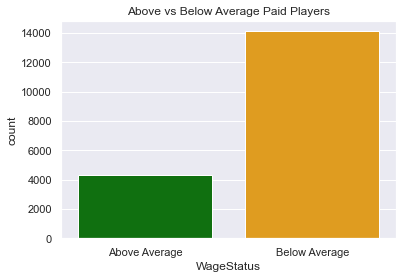

In [145]:
#Visualisation - Split of players for above and below average wage
sns.set(style='darkgrid')
plt.title('Above vs Below Average Paid Players')
ax = sns.countplot(x="WageStatus", data=Fifa_Consolidated, palette=('Green','Orange'))

#Can see that the majority of players are below average wage

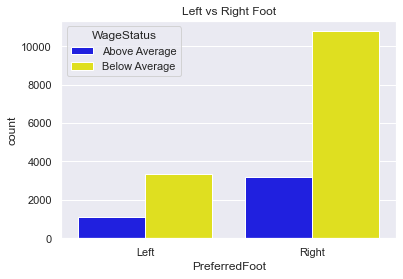

In [131]:
#Visualisation - See does being left or right foot have any impact on average wage
sns.set(style="darkgrid")
plt.title('Left vs Right Foot')
ax = sns.countplot(x="PreferredFoot", data=Fifa_Consolidated, hue='WageStatus', palette=('Blue','Yellow'))

#Can see that the majority of players are right foot, and no real impact on wage status

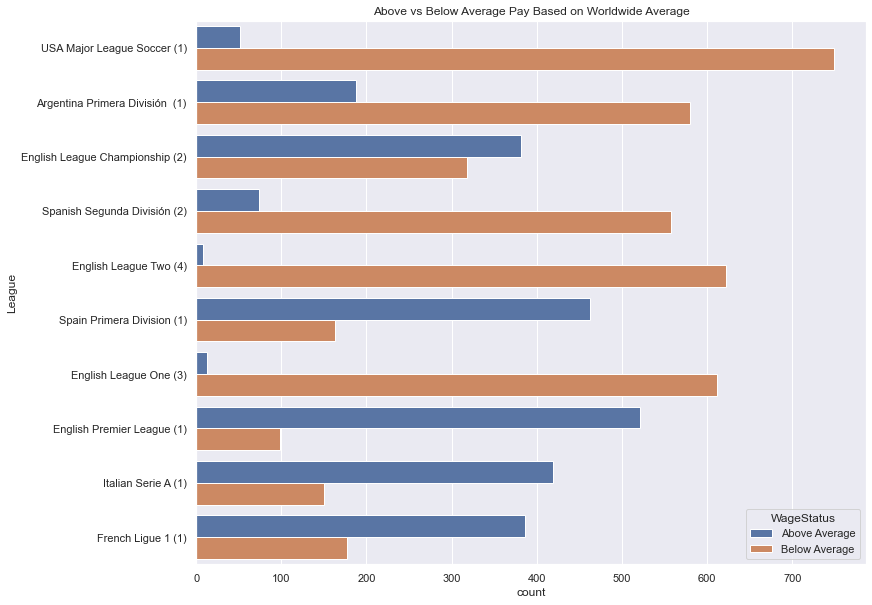

In [132]:
#Visualisation - In the 10 most populated Leagues, show the split between above and below average pay based on worldwide average
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="League", data=Fifa_Consolidated, hue=('WageStatus'), order=Fifa_Consolidated['League'].value_counts().index[0:10])
plt.title('Above vs Below Average Pay Based on Worldwide Average')
plt.show()

In [133]:
#Who is the oldest player?
Fifa_Consolidated.loc[Fifa_Consolidated['Age'] == Fifa_Consolidated['Age'].max()]

,FullName,Age,Nationality,ValueEUR,WageEUR,NationalTeam,PreferredFoot,Club,Potential,League,WageStatus
589,Gianluigi Buffon,44,Italy,1900000,3000,Not in team,Right,Parma,79,Italian Serie B (2),Below Average


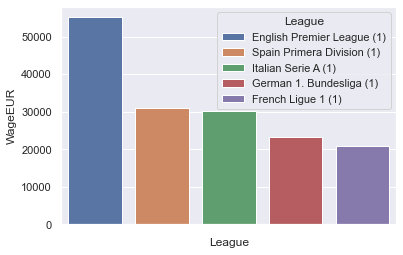

In [134]:
#Use Groupby to group by league, and see the top 5 paying leagues (by average wage)
#Do the top 5 Nationalities align with top 5 leagues?
Top_Leagues = Fifa_Consolidated.groupby('League', as_index=False)['WageEUR'].mean().sort_values(by='WageEUR', ascending=False).head(5)
sns.barplot(data=Top_Leagues, x='League', y='WageEUR', hue='League', dodge=False).set(xticklabels=[]);

In [135]:
#Following identification of the top 5 leagues by average pay, focus in on the Itaian Serie A, and how this might compare to the secondary Serie B
#Use isin function to create a dataframe for the top two Italian Leagues
Italian_Leagues = ['Italian Serie A (1)', 'Italian Serie B (2)']
Fifa_Consolidated[Fifa_Consolidated.League.isin(Italian_Leagues)]
Italian_Summary = Fifa_Consolidated[Fifa_Consolidated.League.isin(Italian_Leagues)]

In [136]:
#Use groupby to see some stats by league and club
Italian_Summary.groupby(['League']).mean()
#Serie A has much higher stats in terms of value, wage and potential of players

,Age,ValueEUR,WageEUR,Potential
League,,,,
Italian Serie A (1),25.173989,9.876555e+06,30189.543058,77.764499
Italian Serie B (2),25.845420,1.338969e+06,2819.942748,70.681298


<AxesSubplot:xlabel='Potential', ylabel='Age'>

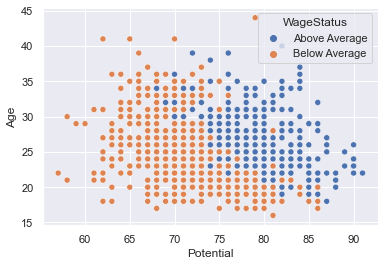

In [137]:
#Visualisation - impact of potential and age on whether players are paid above or below worldwide average wage
sns.scatterplot(x='Potential',y='Age', data=Italian_Summary, hue='WageStatus')
#Can see that high potential has more of an impact compared to age

In [138]:
#Further explore the link between potential and wage
#The scatter plot shows that there are outliers i.e. some players that are below worldwide average pay, but their potential is above 80
#Filter to see how many players have high potential, but are paid below average
Filtered_Italian = Italian_Summary[(Italian_Summary['Potential'] <= 75) & (Italian_Summary['WageStatus'] == 'Below Average')]
Filtered_Italian.shape[0]

518

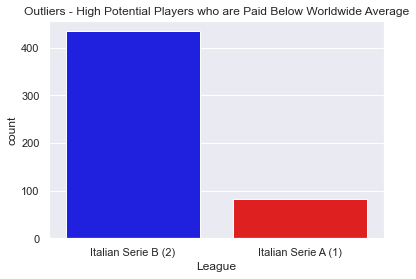

In [139]:
#Visualisation - of the 518 players who have high potential but are below average wage, see if these sit in Serie A or Serie B
sns.set(style="darkgrid")
plt.title('Outliers - High Potential Players who are Paid Below Worldwide Average')
ax = sns.countplot(x="League", data=Filtered_Italian, palette=('Blue','Red'))

#Most of the high potential players who are below average wage are in the lower tier league (Serie B) 

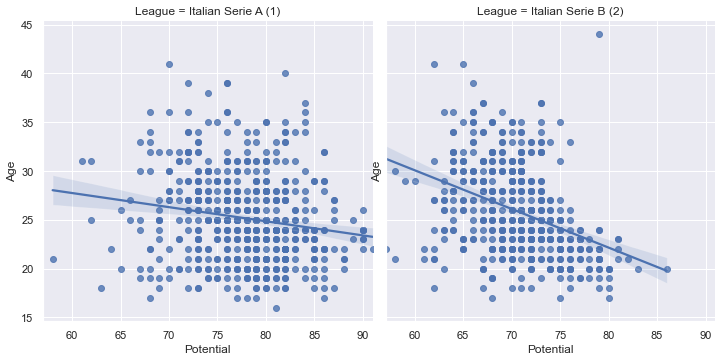

In [140]:
#Using regression modelling (as we want to predict numerical values)
#See how the potential of players varies depending on age across the top 2 Italian Leagues
sns.lmplot(x='Potential',y='Age',data=Italian_Summary, col = 'League')
plt.xlabel('Potential')
plt.ylabel('Age')
plt.show()
#We can predict from the chart that potential decreases with age
#The trend is more flat in Serie A which makes sense as this is the top tier League, so higher potential
#The average age in Serie B is higher, but potentail is lower

In [141]:
#Use isin function to amend the dataframe for the top two Italian Leagues - now also include top two Spanish Legues
Italian_Spanish_Leagues = ['Italian Serie A (1)', 'Italian Serie B (2)','Spain Primera Division (1)','Spanish Segunda División (2)']
Fifa_Consolidated[Fifa_Consolidated.League.isin(Italian_Spanish_Leagues)]
Italian_Spanish_Summary = Fifa_Consolidated[Fifa_Consolidated.League.isin(Italian_Spanish_Leagues)]

In [142]:
#Use groupby to see some stats by the top Italian & Spanish leagues
Italian_Spanish_Summary.groupby(['League']).mean()

,Age,ValueEUR,WageEUR,Potential
League,,,,
Italian Serie A (1),25.173989,9.876555e+06,30189.543058,77.764499
Italian Serie B (2),25.845420,1.338969e+06,2819.942748,70.681298
Spain Primera Division (1),25.356230,1.087947e+07,31068.690096,78.309904
Spanish Segunda División (2),25.272152,1.701274e+06,4651.740506,72.338608


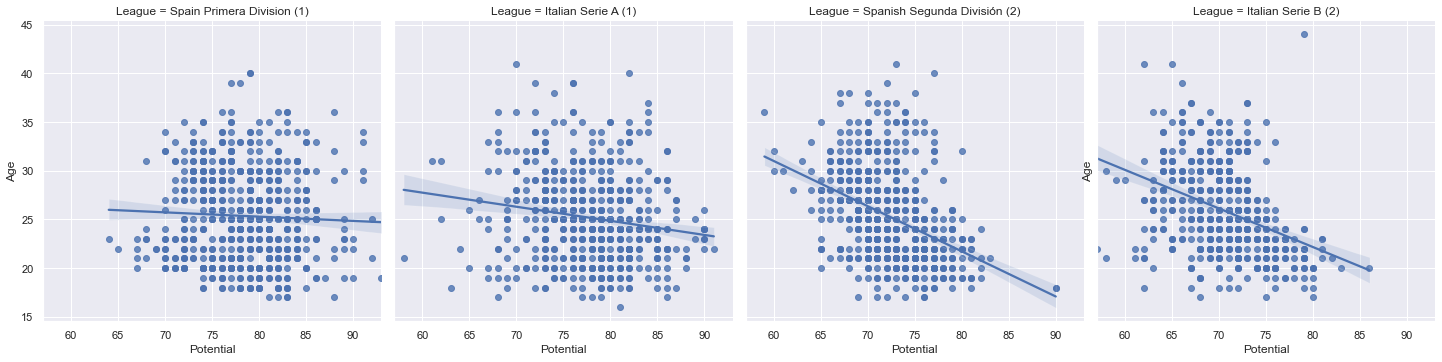

In [143]:
#Plot how the trends compare for the top Spanish & Italian League vs the second tier Leagues
sns.lmplot(x='Potential',y='Age',data=Italian_Spanish_Summary, col = 'League')
plt.xlabel('Potential')
plt.ylabel('Age')
plt.show()
#Trend shows similar line patterns across the top Italian and Spanish Leagues, and also across the second tier leagues